In [1]:
cd /tf/astromer

/tf/astromer


In [2]:
import h5py
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import BatchNormalization, Dense, LSTM, LayerNormalization

In [3]:
file = open('./alcock_emb/train_emb_1.h5', 'rb')
hf = h5py.File(file)
x_train_time = hf['x'][()]
y_train = hf['y'][()]
l_train = hf['l'][()]
m_train = 1. - hf['m'][()]

In [4]:
x_train = np.sum(x_train_time*m_train, 1)/l_train[:,None]

In [5]:
file = open('./alcock_emb/train_emb_2.h5', 'rb')
hf = h5py.File(file)
x_train_time_2 = hf['x'][()]
y_train_2 = hf['y'][()]
l_train_2 = hf['l'][()]
m_train_2 = 1. - hf['m'][()]

In [6]:
x_train_2 = np.sum(x_train_time_2*m_train_2, 1)/l_train_2[:,None]

In [7]:
n_classes = len(np.unique(y_train))
n_classes

6

In [8]:
x_train_1 = np.concatenate([x_train, x_train_2])
y_train_1 = np.concatenate([y_train, y_train_2])

x_train_1.shape

(200000, 256)

In [106]:
indices = np.random.randint(x_train_1.shape[0], size=3750)
x_train_1_reduced = x_train_1[indices]
y_train_1_reduced = y_train_1[indices]

In [107]:
y_train_oneot = tf.one_hot(y_train_1_reduced, n_classes)

In [108]:
y_train_oneot.shape

TensorShape([3750, 6])

In [109]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(n_classes))

In [110]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1024)              263168    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 1542      
Total params: 920,838
Trainable params: 920,838
Non-trainable params: 0
_________________________________________________________________


In [111]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [112]:
model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss=CategoricalCrossentropy(from_logits=True), metrics='accuracy')

In [113]:
estop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=50, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [114]:
%%time
hist = model.fit(x_train_1_reduced, y_train_oneot, 
                 epochs=10000,
                 batch_size=2048,
                 callbacks=[estop],
                 validation_split=0.25)

Epoch 1/10000
2/2 [==============================] - 0s 98ms/step - loss: 2.1074 - accuracy: 0.1792 - val_loss: 2.7177 - val_accuracy: 0.1620
Epoch 2/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.5764 - accuracy: 0.1558 - val_loss: 1.8650 - val_accuracy: 0.1866
Epoch 3/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.8669 - accuracy: 0.1647 - val_loss: 1.9395 - val_accuracy: 0.1716
Epoch 4/10000
2/2 [==============================] - 0s 17ms/step - loss: 1.9283 - accuracy: 0.1686 - val_loss: 1.7579 - val_accuracy: 0.2878
Epoch 5/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.7745 - accuracy: 0.2696 - val_loss: 1.8055 - val_accuracy: 0.1588
Epoch 6/10000
2/2 [==============================] - 0s 22ms/step - loss: 1.7925 - accuracy: 0.1803 - val_loss: 1.8034 - val_accuracy: 0.2729
Epoch 7/10000
2/2 [==============================] - 0s 18ms/step - loss: 1.7795 - accuracy: 0.2756 - val_loss: 1.7246 - val_accuracy: 0.2772
Epoch 

2/2 [==============================] - 0s 18ms/step - loss: 1.2066 - accuracy: 0.5537 - val_loss: 1.1898 - val_accuracy: 0.5362
Epoch 59/10000
2/2 [==============================] - 0s 18ms/step - loss: 1.1799 - accuracy: 0.5473 - val_loss: 1.2119 - val_accuracy: 0.5267
Epoch 60/10000
2/2 [==============================] - 0s 18ms/step - loss: 1.1899 - accuracy: 0.5409 - val_loss: 1.1710 - val_accuracy: 0.5501
Epoch 61/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.1598 - accuracy: 0.5573 - val_loss: 1.1687 - val_accuracy: 0.5650
Epoch 62/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.1407 - accuracy: 0.5679 - val_loss: 1.1406 - val_accuracy: 0.6002
Epoch 63/10000
2/2 [==============================] - 0s 17ms/step - loss: 1.1263 - accuracy: 0.6117 - val_loss: 1.1770 - val_accuracy: 0.5608
Epoch 64/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.1468 - accuracy: 0.5825 - val_loss: 1.1487 - val_accuracy: 0.5832
Epoch 65/10000

2/2 [==============================] - 0s 15ms/step - loss: 1.0272 - accuracy: 0.6131 - val_loss: 0.9996 - val_accuracy: 0.6429
Epoch 116/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.9843 - accuracy: 0.6497 - val_loss: 1.0240 - val_accuracy: 0.6247
Epoch 117/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.0020 - accuracy: 0.6262 - val_loss: 1.0300 - val_accuracy: 0.6109
Epoch 118/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.0077 - accuracy: 0.6216 - val_loss: 1.0382 - val_accuracy: 0.6205
Epoch 119/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.0309 - accuracy: 0.6270 - val_loss: 1.0273 - val_accuracy: 0.6098
Epoch 120/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.9960 - accuracy: 0.6323 - val_loss: 0.9939 - val_accuracy: 0.6482
Epoch 121/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.9783 - accuracy: 0.6494 - val_loss: 1.0546 - val_accuracy: 0.6013
Epoch 12

2/2 [==============================] - 0s 15ms/step - loss: 0.9396 - accuracy: 0.6536 - val_loss: 1.1024 - val_accuracy: 0.5896
Epoch 173/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.0220 - accuracy: 0.6234 - val_loss: 0.9667 - val_accuracy: 0.6503
Epoch 174/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.9581 - accuracy: 0.6497 - val_loss: 0.9540 - val_accuracy: 0.6620
Epoch 175/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.9389 - accuracy: 0.6575 - val_loss: 1.0211 - val_accuracy: 0.6194
Epoch 176/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.9567 - accuracy: 0.6454 - val_loss: 0.9645 - val_accuracy: 0.6567
Epoch 177/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.9307 - accuracy: 0.6654 - val_loss: 1.0214 - val_accuracy: 0.6151
Epoch 178/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.9660 - accuracy: 0.6362 - val_loss: 0.9478 - val_accuracy: 0.6578
Epoch 17

2/2 [==============================] - 0s 16ms/step - loss: 0.9141 - accuracy: 0.6629 - val_loss: 0.9596 - val_accuracy: 0.6429
Epoch 230/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.8999 - accuracy: 0.6703 - val_loss: 0.9569 - val_accuracy: 0.6610
Epoch 231/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.9218 - accuracy: 0.6558 - val_loss: 0.9372 - val_accuracy: 0.6578
Epoch 232/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.8934 - accuracy: 0.6671 - val_loss: 0.9874 - val_accuracy: 0.6418
Epoch 233/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.9178 - accuracy: 0.6515 - val_loss: 0.9419 - val_accuracy: 0.6514
Epoch 234/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.9118 - accuracy: 0.6597 - val_loss: 0.9279 - val_accuracy: 0.6642
Epoch 235/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.8937 - accuracy: 0.6693 - val_loss: 1.0203 - val_accuracy: 0.6258
Epoch 23

2/2 [==============================] - 0s 16ms/step - loss: 0.8713 - accuracy: 0.6853 - val_loss: 0.9569 - val_accuracy: 0.6514
Epoch 287/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.8800 - accuracy: 0.6743 - val_loss: 0.9329 - val_accuracy: 0.6674
Epoch 288/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.8801 - accuracy: 0.6789 - val_loss: 0.9697 - val_accuracy: 0.6429
Epoch 289/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.8777 - accuracy: 0.6785 - val_loss: 0.9616 - val_accuracy: 0.6631
Epoch 290/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.9123 - accuracy: 0.6611 - val_loss: 0.9893 - val_accuracy: 0.6375
Epoch 291/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.9018 - accuracy: 0.6654 - val_loss: 0.9456 - val_accuracy: 0.6652
Epoch 292/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.8995 - accuracy: 0.6682 - val_loss: 0.9683 - val_accuracy: 0.6418
Epoch 29

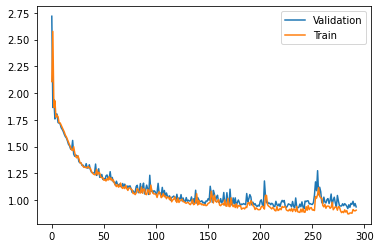

In [115]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'], label='Validation')
plt.plot(hist.history['loss'], label='Train')
plt.legend()

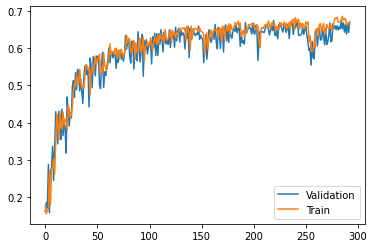

In [116]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.plot(hist.history['accuracy'], label='Train')
plt.legend()

In [117]:
model.save('./my_model_500')

INFO:tensorflow:Assets written to: ./my_model_500/assets


## Testing

In [118]:
import tensorflow as tf
import h5py
import numpy as np

from sklearn.metrics import precision_recall_fscore_support



In [119]:
cd /tf/astromer

/tf/astromer


In [120]:
model = tf.keras.models.load_model('./my_model_500')

In [121]:
metrics = []
for i in range(1, 6):
    with open('./alcock_emb/test_emb_{}.h5'.format(i), 'rb') as file:
        hf = h5py.File(file)
        x_test_time = hf['x'][()]
        y_test = hf['y'][()]
        l_test = hf['l'][()]
        m_test = 1. - hf['m'][()]
    n_classes = len(np.unique(y_test))
    x_test = np.sum(x_test_time*m_test, 1)/l_test[:,None]
    
    indices = np.random.randint(x_test.shape[0], size=750)
    x_test_reduced = x_test[indices]
    y_test_reduced = y_test[indices]
    
    y_pred = model.predict(x_test)
    y_pred_labs = tf.argmax(y_pred, 1)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred_labs, average='macro')
    metrics.append([prec, rec, f1])

In [122]:
np.mean(metrics, 0)

array([0.66200063, 0.65999467, 0.65490203])

In [123]:
np.std(metrics, 0)

array([0.00305335, 0.00351824, 0.00300953])

In [46]:

y_test_oneot = tf.one_hot(y_test, n_classes)

In [52]:
f1

0.7267764383210342